# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

![image.png](attachment:image.png)

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


In [2]:
# solution
import numpy as np
import matplotlib.pyplot as plt



In [3]:
# Creat first image
image1 = np.zeros((100,100), dtype=np.uint8)
image1[:, 50:] = 255

# Creat secode image
image2 = np.ones((100,100), dtype=np.uint8) * 255
image2[:50, : ]= 0

#Creat thired image
image3 = np.zeros((100,100), dtype=np.uint8)
image3[:50,:50] = 255

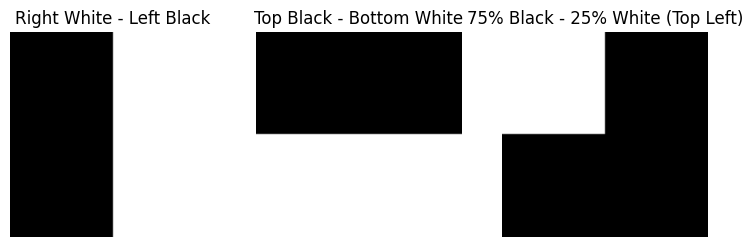

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3), dpi=100)

axes[0].imshow(image1, cmap="gray")
axes[0].set_title("Right White - Left Black")
axes[0].axis("off")

axes[1].imshow(image2, cmap="gray")
axes[1].set_title("Top Black - Bottom White")
axes[1].axis("off")

axes[2].imshow(image3, cmap="gray")
axes[2].set_title("75% Black - 25% White (Top Left)")
axes[2].axis("off")

plt.show()


*   Use the above three images to create the following image

![image-2.png](attachment:image-2.png)
*Hint: Remember channels and color spaces*

In [5]:
# solution

#creat black image as a beginning
image = np.zeros((100,100,3), dtype=np.uint8)

# choose every color
image[:50,:50] = [0, 0, 225]
image[:50, 50:] = [255, 0, 0]
image[50:, :50] = [0, 225, 0]
image[50:, 50:] = [225, 225, 0]

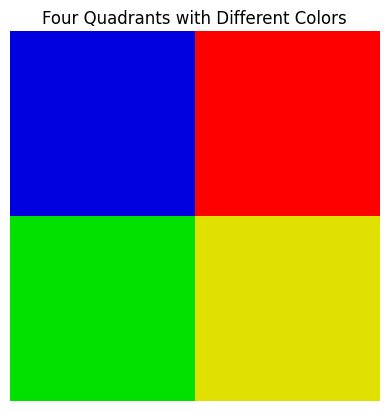

In [6]:
# Show image
plt.imshow(image)
plt.axis("off")
plt.title("Four Quadrants with Different Colors")
plt.show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

![image.png](attachment:image.png)

*   Extract individual channels and plot them using matplotlib subplot.



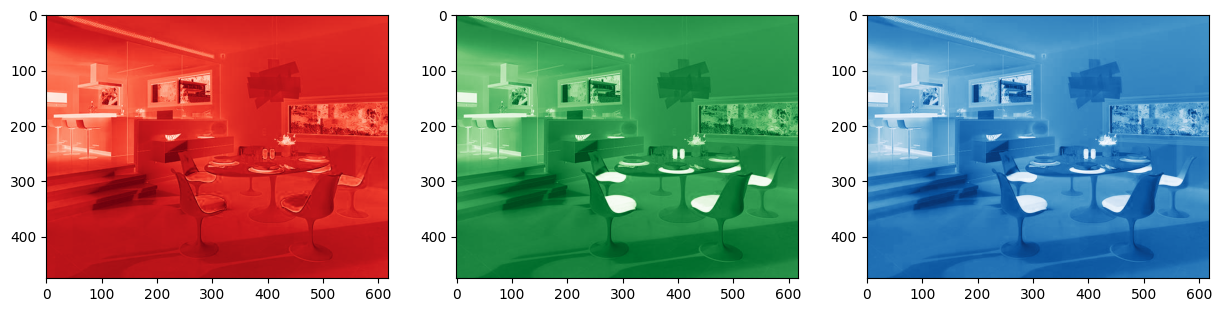

In [8]:
# solution
from PIL import Image

sillas_img = Image.open(r"/content/sillas.jpg")
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(sillas_img.getchannel('R'), cmap='Reds')
plt.subplot(1,3,2)
plt.imshow(sillas_img.getchannel('G'), cmap='Greens')
plt.subplot(1,3,3)
plt.imshow(sillas_img.getchannel('B'), cmap='Blues')
plt.show()


*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

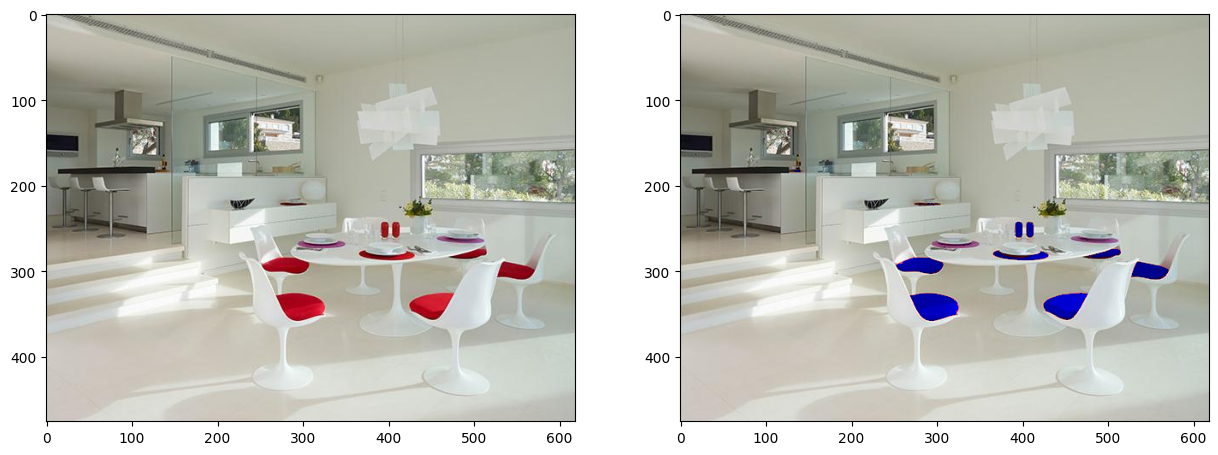

In [24]:
# solution
red_threshold = 90  # Minimum value for the red channel to be considered "red"
other_threshold = 80  # Maximum value for green and blue channels to be considered "red"

sillas_array = np.array(sillas_img)
# Create a boolean mask for red pixels
red_mask = (
    (sillas_array[:, :, 0] > red_threshold) &  # Red channel is high
    (sillas_array[:, :, 1] < other_threshold) &  # Green channel is low
    (sillas_array[:, :, 2] < other_threshold)   # Blue channel is low
)
new_sillas_array = sillas_array.copy()
new_sillas_array[red_mask, 0] = 0  # Set red channel to 0
new_sillas_array[red_mask, 1] = 0  # Set green channel to 0
new_sillas_array[red_mask, 2] = sillas_array[red_mask, 0]  # Set blue channel to red channel's value

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(sillas_array)
plt.subplot(1,2,2)
plt.imshow(new_sillas_array)
plt.show()


# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

![image.png](attachment:image.png)

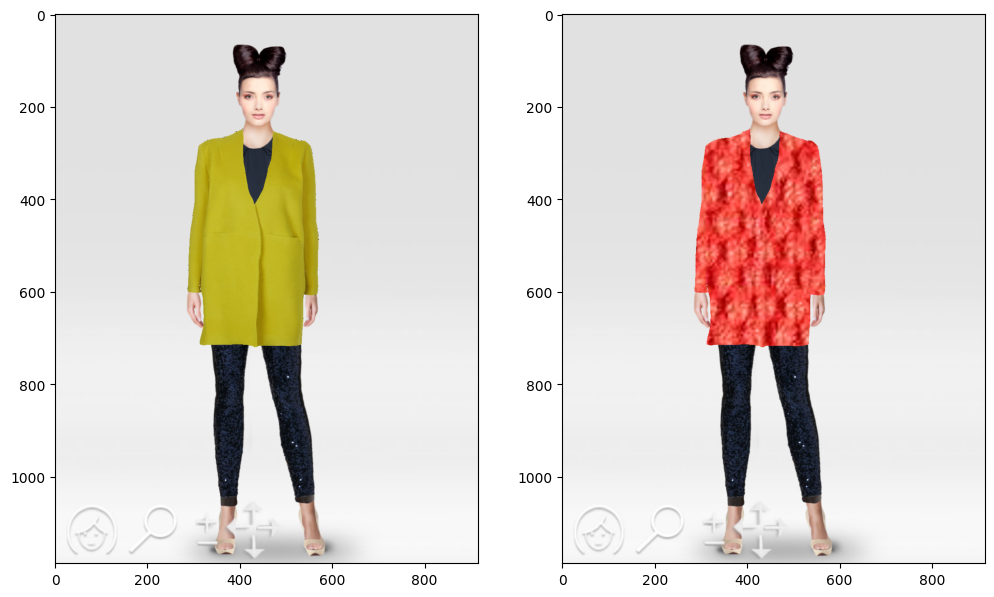

In [28]:
# solution
# solution
model_img = Image.open(r"/content/model.png")
coat_img = Image.open(r"/content/coat.png").convert('RGBA')
coat_arr = np.array(coat_img)



mask = (
    (coat_arr[:, :, 0] > 0) &
    (coat_arr[:, :, 1] > 0) &
    (coat_arr[:, :, 2] > 0)
)

mask_img = Image.fromarray((mask * 255).astype(np.uint8), mode="L")

model_img.paste(coat_img, mask_img)

plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(model_img)

texture1_img = Image.open(r"/content/texture2.png")
model_img.paste(texture1_img, mask_img)

plt.subplot(1,2,2)
plt.imshow(model_img)
plt.show()


# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




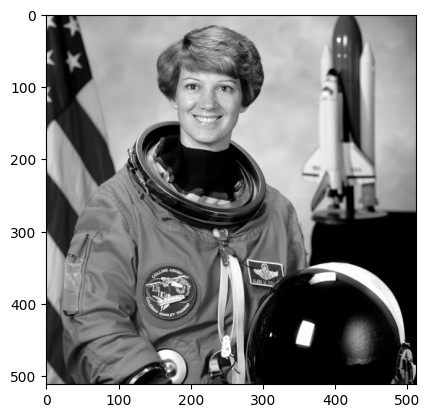

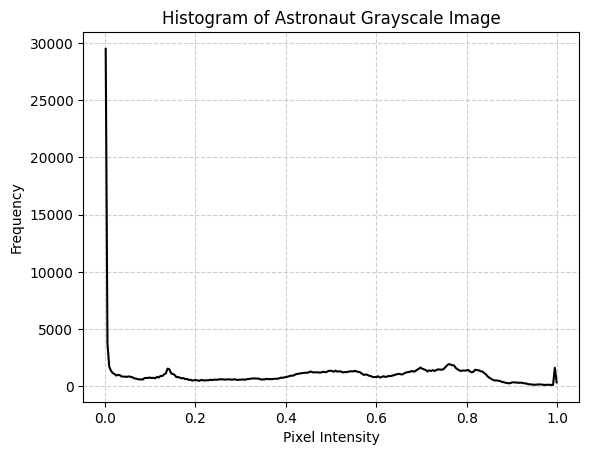

In [22]:
# solution
from skimage.color import rgb2gray

astro_array = data.astronaut()
astro_array_grayscale = rgb2gray(astro_array)

astro_hist, astro_bins = exposure.histogram(astro_array_grayscale)

plt.imshow(astro_array_grayscale, cmap='gray')
plt.show()

plt.plot(astro_bins, astro_hist, color='black')
plt.title("Histogram of Astronaut Grayscale Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

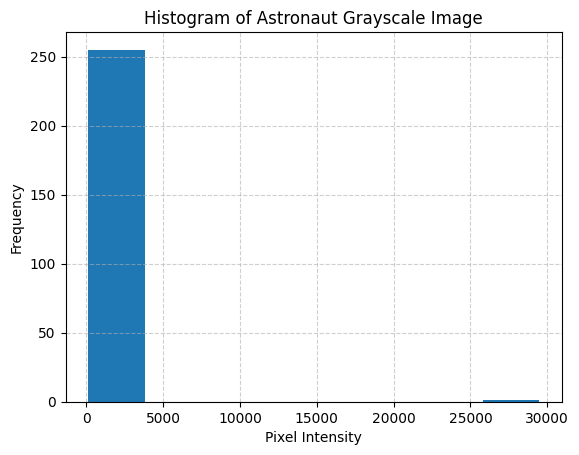

In [12]:
# solution
plt.hist(astro_hist, bins=8)
plt.title("Histogram of Astronaut Grayscale Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()




*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

Fewer bins: Values are grouped together, causing a loss of detail.

More bins: Shows finer details, but might introduce noise.

For 8-bit images (pixel values from 0–255), 256 bins is usually optimal.


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


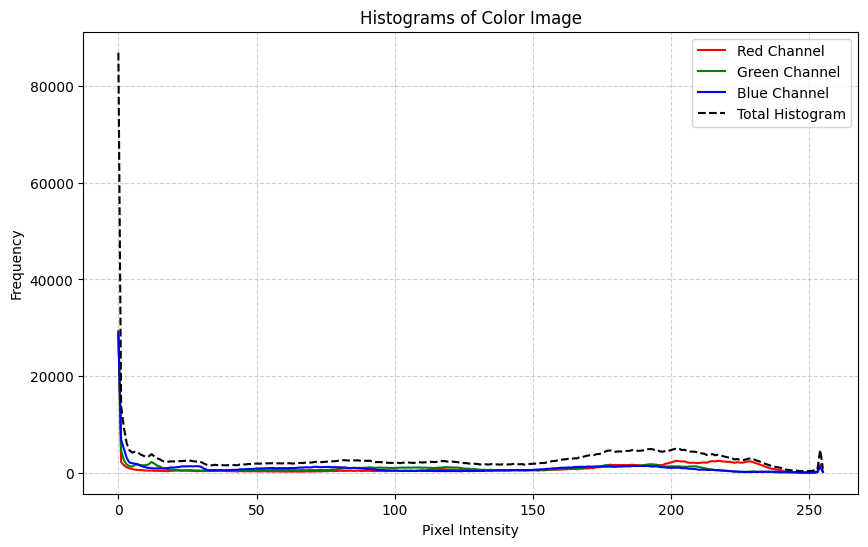

In [23]:
#solution
red_hist, red_bins = np.histogram(astro_array[:, :, 0].ravel(), bins=256, range=[0, 256])
green_hist, green_bins = np.histogram(astro_array[:, :, 1].ravel(), bins=256, range=[0, 256])
blue_hist, blue_bins = np.histogram(astro_array[:, :, 2].ravel(), bins=256, range=[0, 256])

total_hist = red_hist + green_hist + blue_hist

plt.figure(figsize=(10, 6))

# individual channel histograms
plt.plot(red_bins[:-1], red_hist, color='red', label='Red Channel')
plt.plot(green_bins[:-1], green_hist, color='green', label='Green Channel')
plt.plot(blue_bins[:-1], blue_hist, color='blue', label='Blue Channel')

# total histogram
plt.plot(red_bins[:-1], total_hist, color='black', linestyle='--', label='Total Histogram')

plt.title("Histograms of Color Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



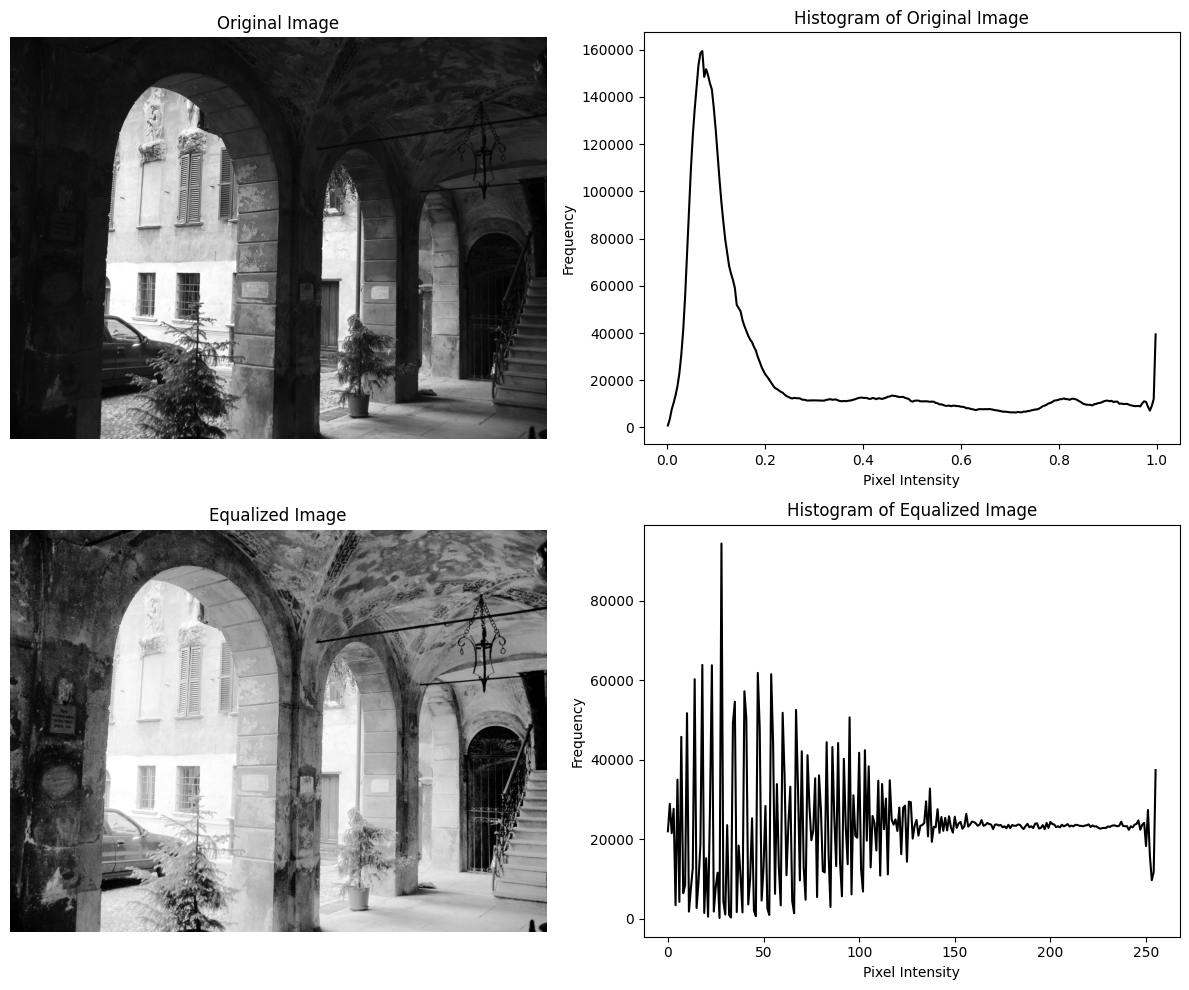

In [14]:
# solution
low_contrast_image = io.imread(r"/content/aquatermi_lowcontrast.jpg", as_gray=True)  # Read as grayscale

hist_original, bins_original = exposure.histogram(low_contrast_image)

equalized_image = exposure.equalize_hist(low_contrast_image)


hist_equalized, bins_equalized = exposure.histogram((equalized_image * 255).astype(np.uint8))  # Scale back to [0, 255]

#  2x2 subplot to display results
plt.figure(figsize=(12, 10))

# original image
plt.subplot(2, 2, 1)
plt.imshow(low_contrast_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# histogram of the original image
plt.subplot(2, 2, 2)
plt.plot(bins_original, hist_original, color='black')
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# equalized image
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')

# histogram of the equalized image
plt.subplot(2, 2, 4)
plt.plot(bins_equalized, hist_equalized, color='black')
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

| Feature          | Histogram Equalization                                                        | Linear Contrast Stretch                                     |
| ---------------- | ----------------------------------------------------------------------------- | ----------------------------------------------------------- |
| **Method**       | Uses cumulative distribution function (CDF) to redistribute pixel intensities | Linearly rescales pixel values to span full intensity range |
| **Goal**         | Enhance contrast globally by flattening the histogram                         | Improve contrast by stretching low and high values          |
| **Effect**       | May create unnatural look in some regions                                     | Preserves relative brightness but may not fix poor contrast |
| **Adaptiveness** | Non-linear, adapts to image's intensity distribution                          | Linear, fixed scaling based on min/max values               |

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function).
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



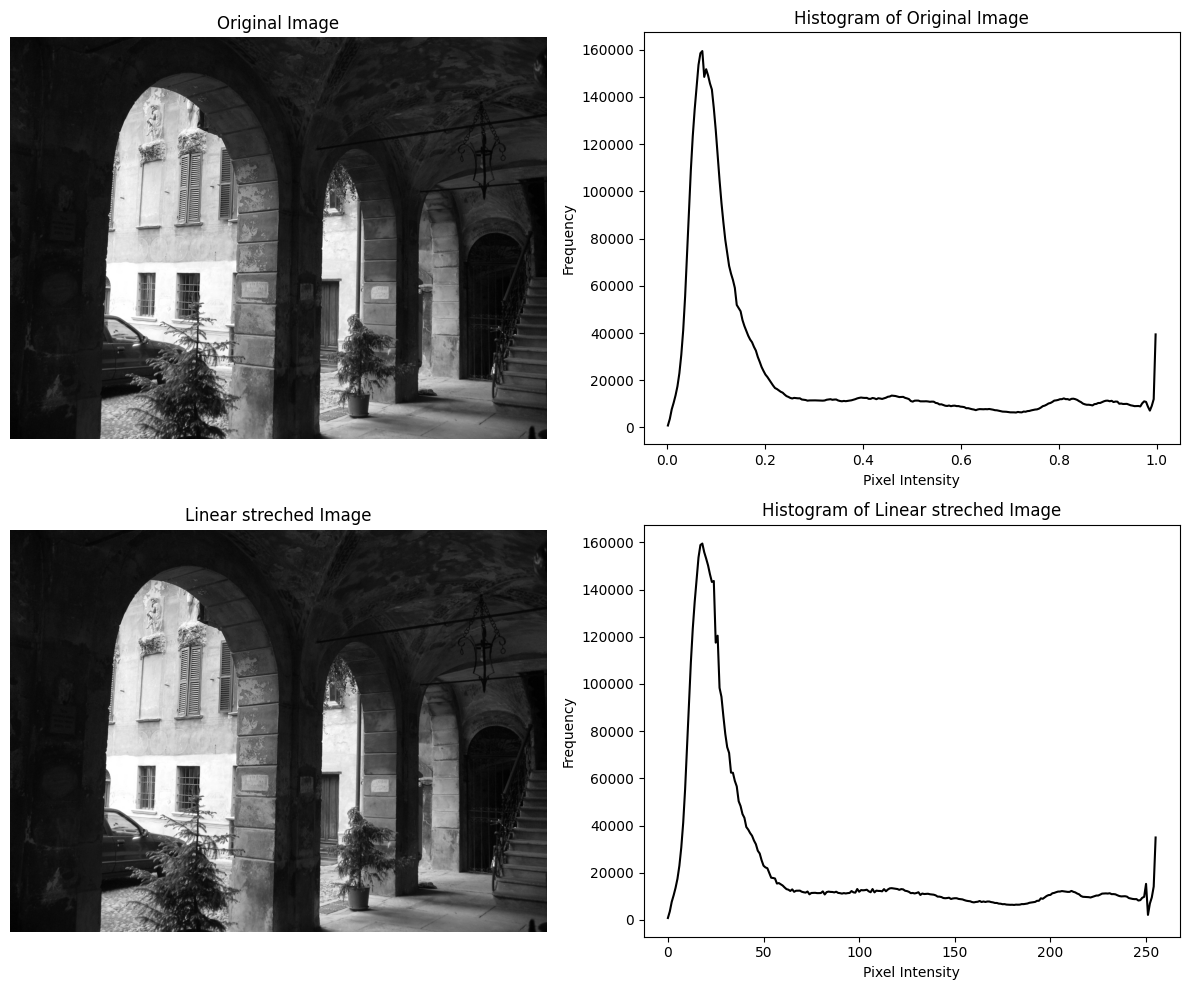

In [15]:
# solution
def linear_contrast_stretch(image_array, bin_count): # I don't know what to do with the bin_count

    min_val = np.min(image_array)
    max_val = np.max(image_array)

    stretched_image = (image_array - min_val) / (max_val - min_val) * 255

    stretched_image = np.clip(stretched_image, 0, 255).astype(np.uint8)

    return stretched_image

linear_image = linear_contrast_stretch(low_contrast_image, None)

hist_linear, bins_linear = exposure.histogram(linear_image)


#  2x2 subplot to display results
plt.figure(figsize=(12, 10))

# original image
plt.subplot(2, 2, 1)
plt.imshow(low_contrast_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# histogram of the original image
plt.subplot(2, 2, 2)
plt.plot(bins_original, hist_original, color='black')
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# linear_image
plt.subplot(2, 2, 3)
plt.imshow(linear_image, cmap='gray')
plt.title("Linear streched Image")
plt.axis('off')

# histogram of the linear_image
plt.subplot(2, 2, 4)
plt.plot(bins_linear, hist_linear, color='black')
plt.title("Histogram of Linear streched Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




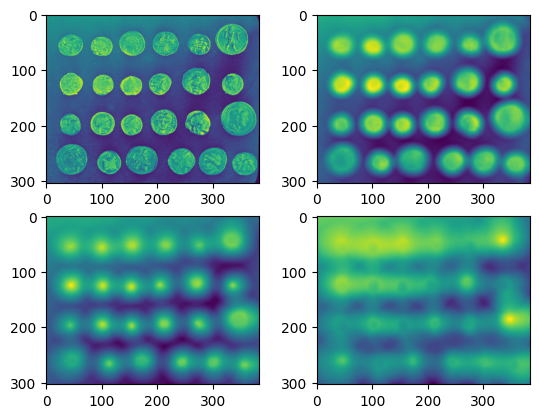

In [16]:
# solution
coins = data.coins()

selem_20 = morphology.disk(20)
selem_10 = morphology.disk(10)
selem_30 = morphology.disk(30)

filtered_coins_20 = filters.rank.mean(coins, selem_20)
filtered_coins_10 = filters.rank.mean(coins, selem_10)
filtered_coins_30 = filters.rank.mean(coins, selem_30)

plt.subplot(2,2,1)
plt.imshow(coins)
plt.subplot(2,2,2)
plt.imshow(filtered_coins_10)
plt.subplot(2,2,3)
plt.imshow(filtered_coins_20)
plt.subplot(2,2,4)
plt.imshow(filtered_coins_30)
plt.show()


*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

<ipython-input-17-0f071c8a96f0>:3: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  "Square": morphology.square(20),
<ipython-input-17-0f071c8a96f0>:4: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  "Rectangle": morphology.rectangle(20, 30),


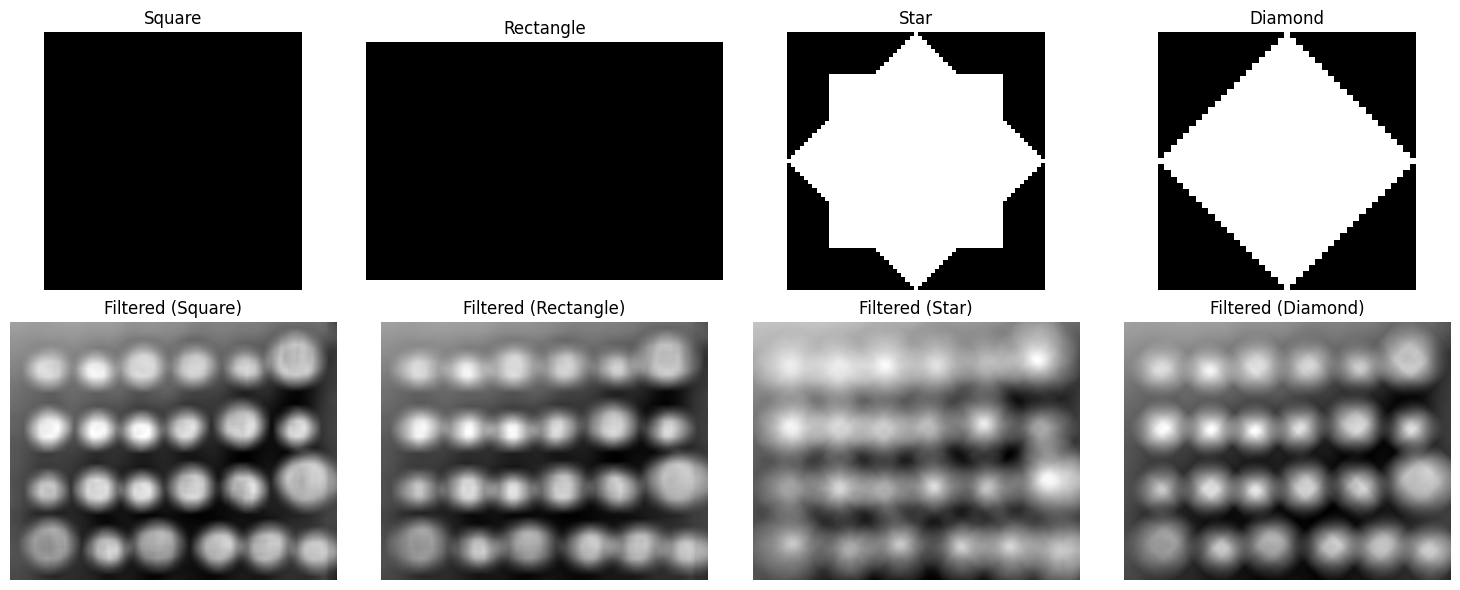

In [17]:
# solution
selems = {
    "Square": morphology.square(20),
    "Rectangle": morphology.rectangle(20, 30),
    "Star": morphology.star(20),
    "Diamond": morphology.diamond(20)
}

# Apply mean filter with different structuring elements
filtered_images = {name: filters.rank.mean(coins, selem) for name, selem in selems.items()}

# Create subplots
fig, axes = plt.subplots(2, len(selems), figsize=(15, 6))

# Plot structuring elements
for i, (name, selem) in enumerate(selems.items()):
    axes[0, i].imshow(selem, cmap='gray')
    axes[0, i].set_title(name)
    axes[0, i].axis("off")

    # Plot filtered images
    axes[1, i].imshow(filtered_images[name], cmap='gray')
    axes[1, i].set_title(f"Filtered ({name})")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()


*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

A smaller radius preserves more details but is less effective at reducing noise, while a larger radius smooths more but causes edge blurring.




*   What is the observed behaviour with difference in the structuring element?



**Solution**


Squares and rectangles provide more smoothing but blur edges, whereas stars and diamonds preserve sharper edges.



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

1/ A mean filter averages pixel values within a region, effectively reducing simple noise but causing edge blurring. In contrast, a Gaussian filter applies a weighted average, producing smoother results while maintaining better edge definition.



2/ Use mean filters for basic noise removal in uniform areas, and opt for Gaussian filters when a more natural blur with improved edge preservation is needed.









...